In [ ]:
#source for code: https://medium.com/@nutanbhogendrasharma/pytorch-convolutional-neural-network-with-mnist-dataset-4e8a4265e118

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from torch.optim import RAdam
import torch.nn.functional as F

#import data
from torchvision import datasets
from torchvision.transforms import ToTensor
train_data = datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

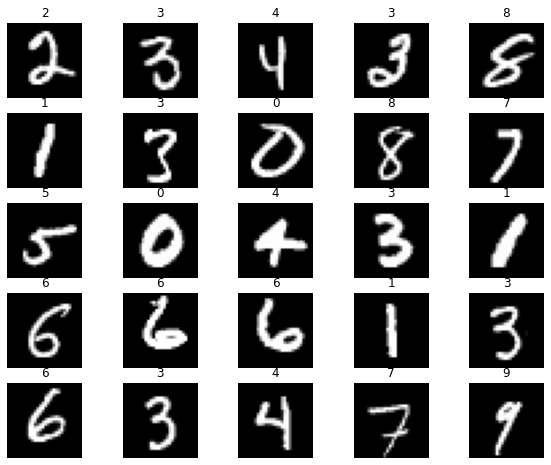

In [ ]:
#show examples of data
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [4]:
#Note: no val set here
#set up data loaders
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7fa1507463d0>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7fa150746350>}

In [ ]:
#define basic cnn architecture

#NOTE: this is a bad architecture
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        #conv layer 1
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=32,            
                kernel_size=3,              
                stride=1,                   
                padding=0,                  
            ),                              
            nn.ReLU(),                      
            #nn.MaxPool2d(kernel_size=2),    
        )
        
        #conv layer 2
        #self.conv2 = nn.Sequential(         
         #   nn.Conv2d(16, 32, 5, 1, 2),     
         #  nn.ReLU(),                      
         #   nn.MaxPool2d(2),                
        #)
        
        #fc layer 1
        self.fc1= nn.Linear(26*26*32, 128)
        
        # fc layer 2, output 10 classes
        self.out = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        #x = self.conv2(x)
        
        # flatten the output of conv1
        x = x.flatten(start_dim=1)   
        #print(x.size)    
        
        #first linear layer
        x=self.fc1(x)
        nn.ReLU(x)
        
        #second linear layer. the output layer
        output = self.out(x)
        output=F.softmax(x,dim=1)
        return output, x    # return x for visualization


In [ ]:
#check architecture/ hyperparams
cnn = CNN()
print(cnn)

#define loss funct
loss_func = nn.CrossEntropyLoss()   
loss_func

#setup optimizer
from torch import optim
optimizer = optim.SGD(cnn.parameters(), lr = 0.01)   
optimizer

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (fc1): Linear(in_features=21632, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)


SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, cnn, loaders):
    
    cnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass
        
        pass
    
    
    pass
train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 4.8478
Epoch [1/10], Step [200/600], Loss: 4.8339
Epoch [1/10], Step [300/600], Loss: 4.7615
Epoch [1/10], Step [400/600], Loss: 4.6318
Epoch [1/10], Step [500/600], Loss: 4.4360
Epoch [1/10], Step [600/600], Loss: 4.3829
Epoch [2/10], Step [100/600], Loss: 4.3379
Epoch [2/10], Step [200/600], Loss: 4.4010
Epoch [2/10], Step [300/600], Loss: 4.3549
Epoch [2/10], Step [400/600], Loss: 4.3765
Epoch [2/10], Step [500/600], Loss: 4.3344
Epoch [2/10], Step [600/600], Loss: 4.2630
Epoch [3/10], Step [100/600], Loss: 4.2428
Epoch [3/10], Step [200/600], Loss: 4.2264
Epoch [3/10], Step [300/600], Loss: 4.2103
Epoch [3/10], Step [400/600], Loss: 4.2293
Epoch [3/10], Step [500/600], Loss: 4.2077
Epoch [3/10], Step [600/600], Loss: 4.2304
Epoch [4/10], Step [100/600], Loss: 4.2115
Epoch [4/10], Step [200/600], Loss: 4.3126
Epoch [4/10], Step [300/600], Loss: 4.3637
Epoch [4/10], Step [400/600], Loss: 4.1635
Epoch [4/10], Step [500/600], Loss: 4.1914
Epoch [4/10

In [ ]:
def test():
    # Test the model
    cnn.eval()
    #accuracy=0
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = cnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
    print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
pass
test()

Test Accuracy of the model on the 10000 test images: 0.65


In [5]:
#define good cnn architecture

#NOTE: this is a good architecture
import torch.nn as nn
class GCNN(nn.Module):
    def __init__(self):
        super(GCNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.out(x)
        return output, x    # return x for visualization

In [7]:
gcnn = GCNN()
print(gcnn)

loss_func = nn.CrossEntropyLoss()   
loss_func

from torch import optim
optimizer = optim.NAdam(gcnn.parameters(), lr = 0.01)   
optimizer

GCNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


NAdam (
Parameter Group 0
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    momentum_decay: 0.004
    weight_decay: 0
)

In [9]:
from torch.autograd import Variable
num_epochs = 10
def train(num_epochs, gcnn, loaders):
    
    gcnn.train()
        
    # Train the model
    total_step = len(loaders['train'])
        
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            
            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = gcnn(b_x)[0]               
            loss = loss_func(output, b_y)
            
            # clear gradients for this training step   
            optimizer.zero_grad()           
            
            # backpropagation, compute gradients 
            loss.backward()    
            # apply gradients             
            optimizer.step()                
            
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            pass
        
        pass
    
    
    pass
train(num_epochs, gcnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.0605
Epoch [1/10], Step [200/600], Loss: 0.1243
Epoch [1/10], Step [300/600], Loss: 0.1145
Epoch [1/10], Step [400/600], Loss: 0.0581
Epoch [1/10], Step [500/600], Loss: 0.0737
Epoch [1/10], Step [600/600], Loss: 0.0205
Epoch [2/10], Step [100/600], Loss: 0.1215
Epoch [2/10], Step [200/600], Loss: 0.0648
Epoch [2/10], Step [300/600], Loss: 0.0343
Epoch [2/10], Step [400/600], Loss: 0.0271
Epoch [2/10], Step [500/600], Loss: 0.0234
Epoch [2/10], Step [600/600], Loss: 0.0232
Epoch [3/10], Step [100/600], Loss: 0.0323
Epoch [3/10], Step [200/600], Loss: 0.0313
Epoch [3/10], Step [300/600], Loss: 0.0649
Epoch [3/10], Step [400/600], Loss: 0.0076
Epoch [3/10], Step [500/600], Loss: 0.0126
Epoch [3/10], Step [600/600], Loss: 0.0216
Epoch [4/10], Step [100/600], Loss: 0.0699
Epoch [4/10], Step [200/600], Loss: 0.0078
Epoch [4/10], Step [300/600], Loss: 0.0549
Epoch [4/10], Step [400/600], Loss: 0.0097
Epoch [4/10], Step [500/600], Loss: 0.0316
Epoch [4/10

In [13]:
def test():
    # Test the model
    gcnn.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in loaders['test']:
            test_output, last_layer = gcnn(images)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (pred_y == labels).sum().item() / float(labels.size(0))
            pass
        print('Test Accuracy of the model on the 10000 test images: %.2f' % accuracy)
    
pass
test()

Test Accuracy of the model on the 10000 test images: 0.99
